<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/3%20-%20Funzioni%20di%20costo%2C%20attivazione%20e%20ottimizzazione/attivazione_costo_metriche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funzioni di Attivazione, Funzioni di Costo e Metriche
Mi sono sentito chiedere davvero spesso quale fosse la differenza tra funzione di attivazione / funzione di costo e quale fosse il rapporto tra quest'ultima e le metriche. In questo notebook proverò a chiarire in maniera esaustiva questi punti :)

### Importiamo i Moduli

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

## Prepariamo i Dati
In questo notebook vedremo nel dettaglio la differenza tra un problema di regressione, classificazione binaria e classificazione multiclasse. A questo scopo utilizzeremo il **Boston Housing Dataset**, un dataset con delle informazioni di abitazioni nella zona di Boston. Importiamolo utilizzando Pandas.

In [2]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Il dataset contiene le seguenti informazioni:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 USD
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in 1000's USD

La colonna MEDV contiene il valore di un'abitazione con le corrispondenti caratteristice e sarà il nostro target. Creiamo Train Set e Test Set.

In [3]:
X = boston.drop("MEDV", axis=1).values
y = boston["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

Eseguiamo la standardizzazione sulle features, per portarle su un range di valori comune.

In [4]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Regressione: Stimare il Valore di un'Abitazione
Come primo problema tenteremo una classificazione, cercando di stimare il valore dell'abitazione (MEDV) utilizzando tutte le altre features. Definiamo la nostra rete neurale. Per un problema di regressione la funzione di attivazione sull'ultimo strato deve essere la *funzione lineare (linear)*.

In [ ]:
regularizer = keras.regularizers.L1L2(l1=0.01, l2=0.1)

model = keras.models.Sequential([
    keras.layers.Dense(64, input_shape=[X.shape[1]], activation="relu", kernel_regularizer=regularizer),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=regularizer),
    keras.layers.Dense(1, activation="linear"),
])

## MSE - Mean Squared Error
Come funzione di costo possiamo utilizzare **L'Errore Quadratico Medio (MSE - Mean Squared Error)**, il quale tende a dare maggior peso agli errori più grandi.

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2$$


In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
12/12 [==============================] - 0s 2ms/step - loss: 607.2388
Epoch 2/200
12/12 [==============================] - 0s 1ms/step - loss: 553.4742
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 492.8711
Epoch 4/200
12/12 [==============================] - 0s 1ms/step - loss: 415.8910
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 321.1479
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 220.1905
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 135.4044
Epoch 8/200
12/12 [==============================] - 0s 1ms/step - loss: 85.3211
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 64.7106
Epoch 10/200
12/12 [==============================] - 0s 1ms/step - loss: 54.0028
Epoch 11/200
12/12 [==============================] - 0s 1ms/step - loss: 46.1999
Epoch 12/200
12/12 [==============================] - 0s 2ms/step - loss: 41.2155
Epoch 13/200
12/12

In [ ]:
metrics_train = model.evaluate(X_train, y_train)
metrics_test = model.evaluate(X_test, y_test)
print("Loss sul set di addestramento %.4f" % (metrics_train))
print("Loss sul set di test %.4f" % (metrics_test))

5/5 [==============================] - 0s 2ms/step - loss: 21.8476
Loss sul set di addestramento 11.9344
Loss sul set di test 21.8476


## MAE - Mean Absolute Error
Un'altra funzione di costo che possiamo utilizzare per problemi di regressione è **l'Errore Assoluto Medio**, che a differenza del MSE penalizza meno gli errori più grandi.

$$MSE = \frac{1}{N}\sum_{i=1}^{N}|Y_i-\hat{Y}_i|$$


In [ ]:
model.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
metrics_train = model.evaluate(X_train, y_train)
metrics_test = model.evaluate(X_test, y_test)

print("Set di Addestramento: MAE = %.4f - MSE = %.4f" % (metrics_train[0], metrics_train[1]))
print("Set di Test: MAE = %.4f - MSE = %.4f" % (metrics_test[0], metrics_test[1]))

5/5 [==============================] - 0s 2ms/step - loss: 4.0988 - mean_squared_error: 24.4204
Set di Addestramento: MAE = 3.2149 - MSE = 13.9150
Set di Test: MAE = 4.0988 - MSE = 24.4204


## RMSE - Root Mean Squared Error
La radice dell'errore quadratico medio è semplicemente la radice quadrata del MSE ed è un'ottima metrica che possiamo utilizzare per stimare di quanto il nostro modello si è sbagliato mediamente.

In [ ]:
from math import sqrt

print("Errore medio: %.2f $" % (sqrt(metrics_test[1])*1000))

Errore medio: 4941.70 $


Con tf.keras possiamo aggiungerlo come metrica durante l'addestramento utilizzando l'apposita funzione.

In [ ]:
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer="adam", loss="mean_squared_error", metrics=[rmse])
model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
metrics_train = model.evaluate(X_train, y_train)
metrics_test = model.evaluate(X_test, y_test)

print("Set di Addestramento: MAE = %.4f - RMSE = %.4f" % (metrics_train[0], metrics_train[1]))
print("Set di Test: MAE = %.4f - RMSE = %.4f"  % (metrics_test[0], metrics_test[1]))

5/5 [==============================] - 0s 1ms/step - loss: 16.0695 - root_mean_squared_error: 3.7311
Set di Addestramento: MAE = 7.3759 - RMSE = 2.2863
Set di Test: MAE = 16.0695 - RMSE = 3.7311


## R2 - Coefficente di Determinazione
L'R2 è una versione standardizzata del MSE, che ci ritorna un punteggio compreso tra 0 e 1 che possiamo interpretare in questo modo:
* **R2 < 0.3** il modello è inutile.
* **0.3 < R2 < 0.5** il modello è scarso.     
* **0.5 < R2 < 0.7** il modello è discreto.
* **0.7 < R2 < 0.9** il modello è buono.
* **0.9 < R2 < 1** il modello è ottimo.
* **R2 = 1** molto probabilmente c'è un errore nel modello.

In [ ]:
from sklearn.metrics import r2_score

print("Coefficente di Determinazione: %.2f" % r2_score(y_test, model.predict(X_test)))

Coefficente di Determinazione: 0.83


## Classificazione Binaria - Quali case sono costose ?
Passiamo alla classificazione binaria, in questo caso cercheremo di distinguere le case economiche, il cui valore è minore o uguale al valore medio, da quelle costose, il cui valore è maggiore del valore medio.

In [13]:
mean_value = y.mean()

y_bin_train = np.where(y_train>mean_value, 1, 0)
y_bin_test = np.where(y_test>mean_value, 1, 0)

Creiamo la Rete Neurale. Per problemi di Classificazione Binaria la funzione di attivazione da utilizzare per l'ultimo strato è la Sigmoide.

In [14]:
regularizer = keras.regularizers.L1L2(l1=0.01, l2=0.1)

model = keras.models.Sequential([
    keras.layers.Dense(64, input_shape=[X.shape[1]], activation="relu", kernel_regularizer=regularizer),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=regularizer),
    keras.layers.Dense(1, activation="sigmoid"),
])

## Accuracy e Cross Entropy
L'accuracy è una semplicissima metrica che ci permette di sapere quante delle classificazioni effettuate dal modello sono effettivamente corrette, ritorna un valore che rappresenta la percentuale di classificazioni corrette compreso tra 0 (nessuna predizione corretta) e 1 (tutte le predizioni sono corrette). Al contrario la Cross Entropy, conosciuta anche come Log Loss o Negative Log-Likelihood, e una funzione di costo che tiene conto anche della probabilità di quanto le classificazioni siano corrette, dove un valore di 0 indica che il modello ha eseguito tutte le predizioni correttamente ed è sicuro al 100% delle predizioni che ha eseguto, mentre più questo valore cresce e più alta è l'incertezza del modello.

In [15]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_bin_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 13.9888 - accuracy: 0.7514
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 12.2298 - accuracy: 0.8136
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 10.6671 - accuracy: 0.8249
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 9.2840 - accuracy: 0.8446
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 8.0664 - accuracy: 0.8475
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 7.0021 - accuracy: 0.8475
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 6.0703 - accuracy: 0.8475
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 5.2553 - accuracy: 0.8503
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 4.5471 - accuracy: 0.8446
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 3.9321 - accuracy: 0.8418
Epoch 

In [16]:
metrics_train = model.evaluate(X_train, y_bin_train, verbose=0)
metrics_test = model.evaluate(X_test, y_bin_test, verbose=0)
print("Accuracy sul set di addestramento: %.2f - Loss sul set di addestramento %.4f" % (metrics_train[1], metrics_train[0]))
print("Accuracy sul set di test: %.2f - Loss sul set di test %.4f" % (metrics_test[1], metrics_test[0]))

Accuracy sul set di addestramento: 0.88 - Loss sul set di addestramento 0.4527
Accuracy sul set di test: 0.84 - Loss sul set di test 0.5476


## Matrice di Confusione
In certi casi è utile sapere non solo quanti errori ha commesso il modello, ma anche quali errori a commesso. Ad esempio in numerose applicazioni mediche classificare un paziente malato come sano è molto più grave che classificare un paziente sano come malato. In questi casi ci conviene stampare una matrice di confusione.

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[83,  6],
       [20, 43]], dtype=int32)>

La matrice di confusione è così formata:
- nel primo riquadro (in alto a sinistra) ci sono i casi negativi classificati come negativi *(True Negative)*
- nel secondo riquadrato (in alto a destra) ci sono i casi positivi classificati come negativi, *(False Negative)*
- nel terzo riquadrato (in basso a sinistra) ci sono i casi negativi classificati come positivi *(False Positive)*
- nel quarto riquadrato (in basso a destra) ci sono i casi positivi classificati come positivi, *(True Positive)*

Se preferiamo possiamo utilizzare anche sklearn per costrurie una matrice di confusione, il risultato sarà lo stesso.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[83,  6],
       [20, 43]])

## Classificazione Multiclasse
Veniamo all'ultimo problema, la Classificazione Multiclasse, in questo caso proveremo a predire il range di valore delle abitazioni, suddividendole in 3 classi:
* **Basso Valore**: Abitazioni che valgono meno di 190.000 USD.
* **Valore Medio**: Abitazioni che valgono tra 190.000 e 240.000 USD.
* **Alto Valore**: Abitazioni che valgono oltre 240.000 USD. 

In [5]:
def map_to_class(value):
  if value < 19:
    return 0
  elif value < 24:
    return 1
  else:
    return 2

vfunc = np.vectorize(map_to_class)
y_multi_train = vfunc(y_train)
y_multi_test = vfunc(y_test)

Codifichiamo il target utilizzando il *One Hot Encoding*.

In [6]:
y_multi_train_oh = tf.one_hot(y_multi_train, 3).numpy()
y_multi_test_oh = tf.one_hot(y_multi_test, 3).numpy()

Definiamo la Rete Neurale. Per problemi di classificazione multiclasse la funzione di attivazione da utilizzare per l'ultimo strato è la *Softmax*, la quale ci ritorna la probabilità comulutavia per ogni classe. Anche la Simoid può andare, ma in quel caso le probabilità non saranno comulative.

In [62]:
regularizer = keras.regularizers.L1L2(l1=0.01, l2=0.1)

model = keras.models.Sequential([
    keras.layers.Dense(64, input_shape=[X.shape[1]], activation="relu", kernel_regularizer=regularizer),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=regularizer),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(3, activation="softmax"),
])

Per quanto riguarda la funzione di costo, possiamo utilizzare la *Categorical Crossentropy*, che è una variante della Cross Entropy adattata per problemi in cui abbiamo più di due classi.

In [63]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_multi_train_oh, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 14.1722 - accuracy: 0.5141
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 12.3939 - accuracy: 0.6017
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 10.8298 - accuracy: 0.6384
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 9.4434 - accuracy: 0.6384
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 8.2268 - accuracy: 0.6441
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 7.1663 - accuracy: 0.6610
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 6.2403 - accuracy: 0.6808
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 5.4475 - accuracy: 0.6836
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 4.7462 - accuracy: 0.6695
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 4.1341 - accuracy: 0.6864
Epoch 

In [64]:
metrics_train = model.evaluate(X_train, y_multi_train_oh, verbose=0)
metrics_test = model.evaluate(X_test, y_multi_test_oh, verbose=0)
print("Accuracy sul set di addestramento: %.2f - Loss sul set di addestramento %.4f" % (metrics_train[1], metrics_train[0]))
print("Accuracy sul set di test: %.2f - Loss sul set di test %.4f" % (metrics_test[1], metrics_test[0]))

Accuracy sul set di addestramento: 0.82 - Loss sul set di addestramento 0.5481
Accuracy sul set di test: 0.74 - Loss sul set di test 0.7641


Anche per problemi di classificazione multiclasse possiamo stampare la matrice di confusione.

In [65]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = tf.math.confusion_matrix(y_multi_test, y_pred)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[43, 12,  0],
       [ 6, 39,  8],
       [ 3, 11, 30]], dtype=int32)>

Per renderla più semplice da interpretare possiamo costruire una visualizzazione servendoci di Seaborn e Pandas.

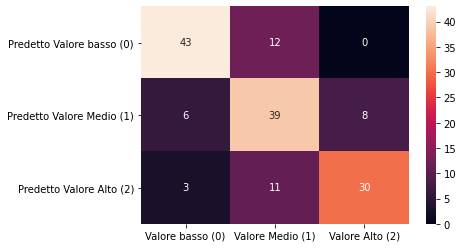

In [71]:
from seaborn import heatmap

df_cm = pd.DataFrame(cm.numpy(), index = ["Predetto Valore basso (0)","Predetto Valore Medio (1)", "Predetto Valore Alto (2)"],
                  columns = ["Valore basso (0)","Valore Medio (1)", "Valore Alto (2)"])
heatmap(df_cm, annot=True)